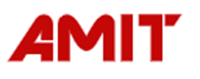
 # Deep Learning Final Project

This final project conclusively proves your understanding and comprehension of each part of the explanation, so you must perform all the following tasks to confirm your understanding and knowledge of each topic.

#### In this exceptional project, we will cover all topics related to deep learning. Therefore, it’s important to study carefully and answer each section thoroughly to demonstrate your understanding of the module. The final part is optional, but it’s highly encouraged if you make an effort to complete it. We will discuss the project in our upcoming lectures with each individual to ensure a comprehensive understanding of this extensive subject.



To assess your understanding we use a popular dataset called MNIST
- The MNIST dataset (Modified National Institute of Standards and Technology) is one of the most well-known datasets in the field of machine learning and computer vision. It consists of:

- Images:

60,000 training images and 10,000 test images.
Each image is a 28x28 grayscale image representing a handwritten digit (0-9).
The pixel values range from 0 (black) to 255 (white).
- Labels:

Each image has a corresponding label indicating which digit (0-9) it represents.

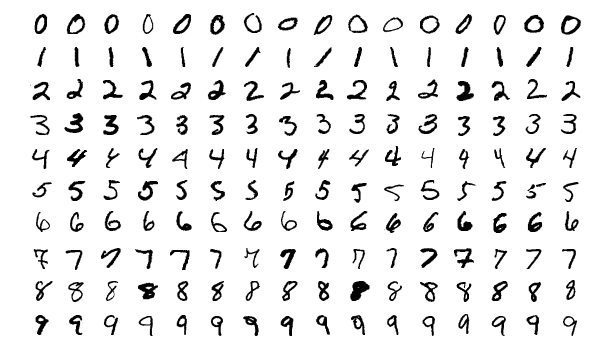

for  every project 

In [21]:
# import Libraries
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import sys
sys.path.append("../..")
# import matplotlib_utils
from importlib import reload
from sklearn.model_selection import ParameterGrid

#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

from tqdm import tqdm


We're using TF 2.17.0


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [22]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train [shape (48000, 28, 28)] sample patch:
 [[  0  77 254 154   0]
 [  0 145 253  96   0]
 [  0 254 238  37   0]
 [  0 254 229   0   0]
 [  0 254 246  69   0]]
A closeup of a sample patch:


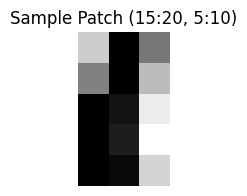

And the whole sample:


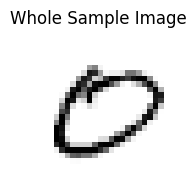

y_train [shape (48000,)] 10 samples:
 [5 0 1 6 1 3 8 8 1 8]


In [23]:
fig, ax = plt.subplots(figsize=(2, 2))  # Set figure size (width, height) in inches

# Display a sample patch from the image
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
ax.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
ax.set_title("Sample Patch (15:20, 5:10)")
ax.axis('off')  # Hide the axes
plt.show()

# Display the whole sample image with a different size
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust the size as needed
print("And the whole sample:")
ax.imshow(X_train[1], cmap="Greys")
ax.set_title("Whole Sample Image")
ax.axis('off')  # Hide the axes
plt.show()

# Display the y_train values
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])


# Load and preprocess the MNIST dataset

In [24]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (normalize)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0




# Flatten the images (28x28 -> 784)

In [25]:

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)



# One-hot encode labels

In [26]:

y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)



# Define a function to create and compile the model


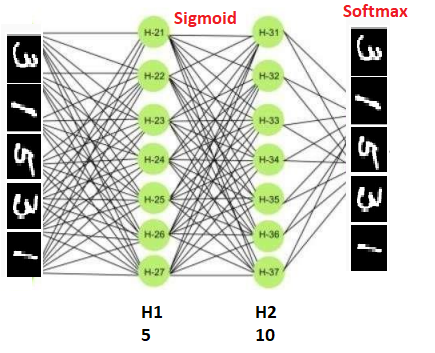

In [27]:
# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4858 - loss: 1.7247 - val_accuracy: 0.7890 - val_loss: 0.9928
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7913 - loss: 0.9136 - val_accuracy: 0.8276 - val_loss: 0.7084
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8249 - loss: 0.6904 - val_accuracy: 0.8347 - val_loss: 0.6043
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8380 - loss: 0.6019 - val_accuracy: 0.8537 - val_loss: 0.5521
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8518 - loss: 0.5490 - val_accuracy: 0.8572 - val_loss: 0.5205
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8599 - loss: 0.5164 - val_accuracy: 0.8671 - val_loss: 0.4948
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8628 - loss: 0.4956 - val_accuracy: 0.8687 - val_loss: 0.4799
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8693 - loss: 0.4788 - 

#### Put here the accuracy of the basic model 
| Accuracy         | 0.8655999898910522   |
|--------------|----------------|
 #### Give me the reson for this result

 becuase number of number of layes is not sufficient for the model
 and we used sigmoid

# Gride search algorithm to choose the best parameters

for code below try to choose another papmeters and try to built all avalaible parameters


In [28]:
import tensorflow as tf
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.1):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [500,1000,2000,3000,5000],            # Different batch sizes
    'epochs': [5,10,20],                     # Different number of epochs
    'model__optimizer': ['adam','rmsprop'],  # Different optimizers with proper prefix
    'model__learning_rate': [ 0.01,0.001]  # Different learning rates with proper prefix
}

# Initialize the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search and wrap with progress bar
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']), desc="Grid Search Progress", unit="iteration") as pbar:
    grid_result = grid.fit(X_train, y_train_oh)
    pbar.update(1)

# Use cv_results_ instead of the deprecated grid_scores_
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Display the cross-validation results
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_loss, test_acc = best_model.model_.evaluate(X_test, y_test_oh)  # Use `model_` to access the underlying Keras model
print(f"Test Accuracy: {test_acc}")


Grid Search Progress:   0%|          | 0/15 [00:00<?, ?iteration/s]c:\Users\workstation\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\workstation\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Grid Search Progress:   7%|▋         | 1/15 [05:29<1:16:55, 329.65s/iteration]


Best score: 0.87135 using {'batch_size': 500, 'epochs': 20, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
Mean: 0.8444, Std: 0.0038, Params: {'batch_size': 500, 'epochs': 5, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
Mean: 0.8323, Std: 0.0091, Params: {'batch_size': 500, 'epochs': 5, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
Mean: 0.6667, Std: 0.0327, Params: {'batch_size': 500, 'epochs': 5, 'model__learning_rate': 0.001, 'model__optimizer': 'adam'}
Mean: 0.6589, Std: 0.0169, Params: {'batch_size': 500, 'epochs': 5, 'model__learning_rate': 0.001, 'model__optimizer': 'rmsprop'}
Mean: 0.8653, Std: 0.0114, Params: {'batch_size': 500, 'epochs': 10, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
Mean: 0.8553, Std: 0.0072, Params: {'batch_size': 500, 'epochs': 10, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
Mean: 0.7741, Std: 0.0280, Params: {'batch_size': 500, 'epochs': 10, 'model__learning_rate': 0.001, 'model__optim

- so kindly fill the table below to enhance your good choise  

-parameters on grid search 
|epochs| batch_size | optimizer_1 | optimizer_2 | learning_rate_1 | learning_rate_2 |
|------|------------|-------------|-------------|-----------------|-----------------|
|5| 500        | adam        | rmsprop     | 0.001           | 0.01            |
|10| 1000       | adam        | rmsprop     | 0.001           | 0.01            |
|20| 2000       | adam        | rmsprop     | 0.001           | 0.01            |
|| 3000       | adam        | rmsprop     | 0.001           | 0.01            |
|| 5000       | adam        | rmsprop     | 0.001           | 0.01            |

-

 print here the best paramerters give you the best accuracy regarding for archticture design above
- | batch_size    | epochs    | optimizer | learning_rate      | Accueracy      |
   |--------------|-----|-----|-----------------|-----------------|
   |500|20|rmsprop|0.01|0.8717833333333332 |

- After you know the best optimizer and good Learning rate for the above archticture
- please design your model and put here the final result 

Here  i was converted squentional model into functional ApI Model
- so re-design Your model by adding some hidden layer and change the activation function

In [29]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(1000, activation='relu')(inputs)
    # Hidden layer2
    x2 = tf.keras.layers.Dense(1000, activation='relu')(x)
    # Hidden layer2
    x3 = tf.keras.layers.Dense(1500, activation='relu')(x2)
    # Hidden layer2
    x4 = tf.keras.layers.Dense(1000, activation='relu')(x3)
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x4)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=48, batch_size=1000, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.7118 - loss: 0.8404 - val_accuracy: 0.9612 - val_loss: 0.1295
Epoch 2/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.9681 - loss: 0.1067 - val_accuracy: 0.9683 - val_loss: 0.0999
Epoch 3/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.9843 - loss: 0.0527 - val_accuracy: 0.9740 - val_loss: 0.0880
Epoch 4/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.9915 - loss: 0.0293 - val_accuracy: 0.9746 - val_loss: 0.0863
Epoch 5/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - accuracy: 0.9915 - loss: 0.0244 - val_accuracy: 0.9768 - val_loss: 0.0892
Epoch 6/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.9940 - loss: 0.0203 - val_accuracy: 0.9769 - val_loss: 0.0891
Epoch 7/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9784 - val_loss: 0.0935
Epoch 8/48
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accu

In [30]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(100, activation='relu')(inputs)
    # Hidden layer2
    x1 = tf.keras.layers.Dense(100, activation='relu')(x)
    # Hidden layer2
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x1)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=48, validation_split=0.3)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh,batch_size=5)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8424 - loss: 0.5439 - val_accuracy: 0.9504 - val_loss: 0.1684
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9578 - loss: 0.1411 - val_accuracy: 0.9591 - val_loss: 0.1326
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9714 - loss: 0.0920 - val_accuracy: 0.9658 - val_loss: 0.1169
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9805 - loss: 0.0619 - val_accuracy: 0.9685 - val_loss: 0.1032
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9846 - loss: 0.0493 - val_accuracy: 0.9695 - val_loss: 0.1062
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0348 - val_accuracy: 0.9661 - val_loss: 0.1215
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9705 - val_loss: 0.1136
Epoch 8/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9931 - loss: 0.0220 - val_accuracy: 0.

Total Samples: The MNIST dataset has 60,000 training samples.

Batch Size: If your batch size is set to 40 (for example), each batch consists of 40 samples.

Batches per Epoch: The total number of batches for an epoch is calculated by dividing the total number of samples by the batch size. For instance, with 60,000 samples and a batch size of 40:

Epoch Iteration: During each epoch, the model goes through all the batches (1500 in this case), which means it sees all the training data once.



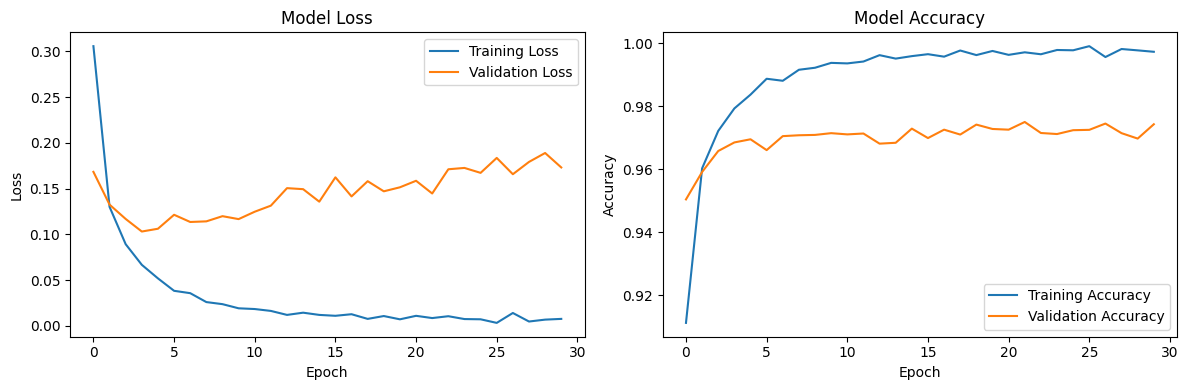

In [31]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


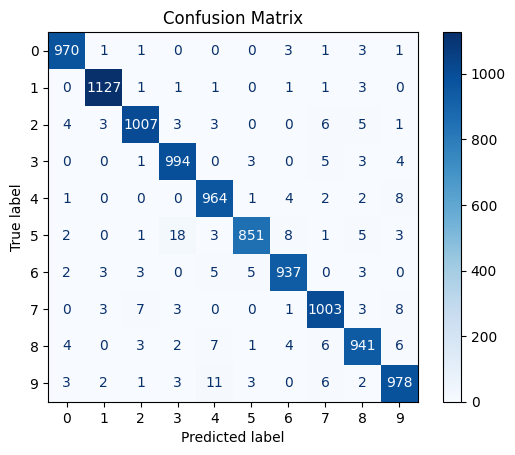

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hints!!!!

Total batches = Total samples / Batch size = 10,000 / 32 ≈ 313 batches.

# Answer the below Questions 

# Q1
### Why is the sigmoid function considered ineffective for hidden layers, and what are the benefits of using it in the output layer?

because it may cause vanishing because its derivative tends to be zero with icrease or decrease in value

# Q2: For your enhanced model, please use the grid search algorithm to explore various optimization algorithms. Provide a brief description of each type and then list the best one in the table below.

In [33]:
import tensorflow as tf
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(100, activation='relu')(inputs)
    # Hidden layer2
    x1 = tf.keras.layers.Dense(100, activation='relu')(x)
    # Hidden layer2
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x1)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [48],            # Different batch sizes
    'epochs': [30],                     # Different number of epochs
    'model__optimizer': ['SGD','Momentum','rmsprop','AdaDelta','Adagrad','adam'],  # Different optimizers with proper prefix
    'model__learning_rate': [ 0.001]  # Different learning rates with proper prefix
}

# Initialize the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search and wrap with progress bar
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']), desc="Grid Search Progress", unit="iteration") as pbar:
    grid_result = grid.fit(X_train, y_train_oh)
    pbar.update(1)

# Use cv_results_ instead of the deprecated grid_scores_
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Display the cross-validation results
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_loss, test_acc = best_model.model_.evaluate(X_test, y_test_oh)  # Use `model_` to access the underlying Keras model
print(f"Test Accuracy: {test_acc}")


Grid Search Progress:   0%|          | 0/1 [00:00<?, ?iteration/s]c:\Users\workstation\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\workstation\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\workstation\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample

Best score: 0.9736333333333334 using {'batch_size': 48, 'epochs': 30, 'model__learning_rate': 0.001, 'model__optimizer': 'rmsprop'}
Mean: 0.9109, Std: 0.0024, Params: {'batch_size': 48, 'epochs': 30, 'model__learning_rate': 0.001, 'model__optimizer': 'SGD'}
Mean: nan, Std: nan, Params: {'batch_size': 48, 'epochs': 30, 'model__learning_rate': 0.001, 'model__optimizer': 'Momentum'}
Mean: 0.9736, Std: 0.0008, Params: {'batch_size': 48, 'epochs': 30, 'model__learning_rate': 0.001, 'model__optimizer': 'rmsprop'}
Mean: 0.8223, Std: 0.0107, Params: {'batch_size': 48, 'epochs': 30, 'model__learning_rate': 0.001, 'model__optimizer': 'AdaDelta'}
Mean: 0.9220, Std: 0.0030, Params: {'batch_size': 48, 'epochs': 30, 'model__learning_rate': 0.001, 'model__optimizer': 'Adagrad'}
Mean: 0.9711, Std: 0.0026, Params: {'batch_size': 48, 'epochs': 30, 'model__learning_rate': 0.001, 'model__optimizer': 'adam'}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9741 - loss: 0.1975
Test Accuracy: 0.9781000


| Optimizer   | Accuracy       |
|-------------|----------------|
| SGD         |     0.9123           |
| Momentum    |     nan   (exploding)        |
| RMSprop     |     0.9751           |
| AdaDelta    |     0.8175           |
| Adagrad     |      0.9210          |
| Adam        |      0.9728          |

-

# Q3: What is the main cause of the vanishing gradient problem, and how can we solve it?

the main cause of vanishsing is the low values of change in weights, we can solve it by using other activation function other than segmoid

## "In the code below, the model is likely experiencing the vanishing gradient problem. Try to solve it in a separate cell."

In [34]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=1,stddev=1)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

c:\Users\workstation\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1038 - loss: 8.8788 - val_accuracy: 0.1081 - val_loss: 2.3045
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1089 - loss: 2.3053 - val_accuracy: 0.0975 - val_loss: 2.3086
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1041 - loss: 2.3064 - val_accuracy: 0.1060 - val_loss: 2.3035
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1050 - loss: 2.3066 - val_accuracy: 0.0975 - val_loss: 2.3047
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1067 - loss: 2.3070 - val_accuracy: 0.1060 - val_loss: 2.3049
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1074 - loss: 2.3080 - val_accuracy: 0.1060 - val_loss: 2.3083
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1073 - loss: 2.3076 - val_accuracy: 0.1060 - val_loss: 2.3075
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1010 - loss: 2.3092 - val_accuracy: 0.

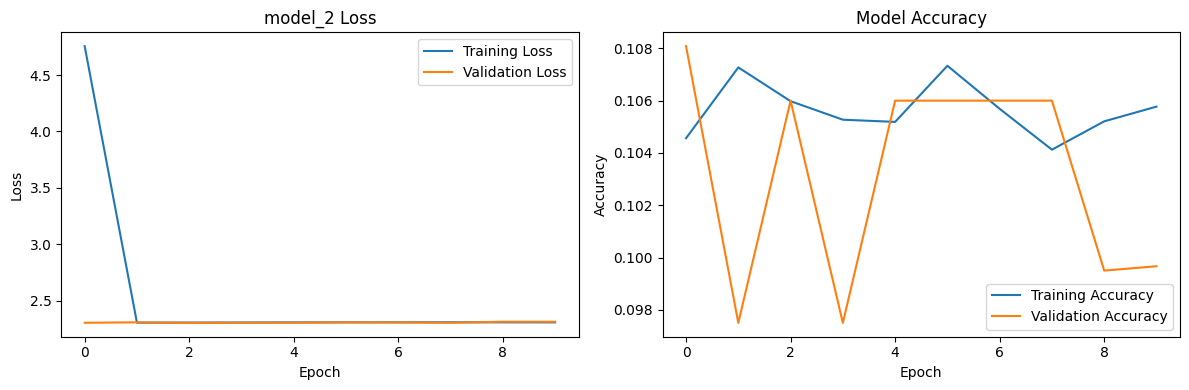

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5370 - loss: 19.8381 - val_accuracy: 0.8516 - val_loss: 2.8147
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8580 - loss: 2.5282 - val_accuracy: 0.8859 - val_loss: 1.8187
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8986 - loss: 1.4251 - val_accuracy: 0.9007 - val_loss: 1.3923
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 1.0387 - val_accuracy: 0.9096 - val_loss: 1.1915
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9286 - loss: 0.7686 - val_accuracy: 0.9153 - val_loss: 1.0225
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 0.5899 - val_accuracy: 0.9206 - val_loss: 0.9371
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9449 - loss: 0.4776 - val_accuracy: 0.9254 - val_loss: 0.8503
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9561 - loss: 0.3455 - val_accuracy: 0

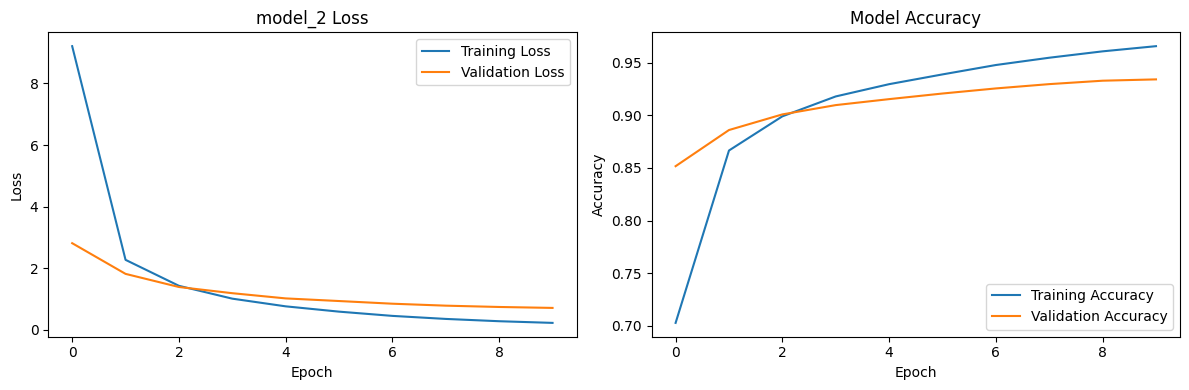

In [37]:
#after changing activation fn to relu

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=0,stddev=0.5)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'relu', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'relu', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### After providing your answer to the question above, please share your opinion on how to improve the performance of this model or address the issue described.

the performance became better with just changing activation function from sigmoid to relu

# Exploding Gradient

# Q4: What is the main cause of the Exploding gradient problem, and how can we solve it?

the main cause of explosion is the large value of update in weights in back probagation , this may happen when using wrong activation function and may happen when making large weight in initialization 

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [0.50338286, 0.06824295, 1.6711955, 0.2075908]
Gradient Norms: [0.46843544, 0.060032874, 1.4734596, 0.18282858]
Gradient Norms: [0.4421118, 0.053398166, 1.3137388, 0.16278967]
Gradient Norms: [0.42197517, 0.047933247, 1.182234, 0.14625594]
Gradient Norms: [0.40634745, 0.043353125, 1.0720567, 0.13237137]
Gradient Norms: [0.3940597, 0.039454736, 0.9783023, 0.12052599]
Gradient Norms: [0.3842859, 0.036091097, 0.8974285, 0.11027821]
Gradient Norms: [0.3764333, 0.033154048, 0.82683617, 0.10130443]
Gradient Norms: [0.37006992, 0.030562812, 0.76459044, 0.09336272]
Gradient Norms: [0.36487588, 0.028256182, 0.7092304, 0.086270735]


## "Please provide proof of the effectiveness of your solution. How does it impact the results?" print here all Gradient term before and after add your solution



before 
Gradient Norms: [0.45742738, 0.06076502, 1.4383717, 0.17674899]
Gradient Norms: [0.44492587, 0.05760406, 1.3687404, 0.16817522]
Gradient Norms: [0.433996, 0.0547305, 1.304902, 0.16030638]
Gradient Norms: [0.42435813, 0.052091733, 1.2457641, 0.15300846]
Gradient Norms: [0.4157977, 0.049647152, 1.1905028, 0.14617988]
Gradient Norms: [0.40814695, 0.047364887, 1.1384844, 0.13974369]
Gradient Norms: [0.401273, 0.04521964, 1.089216, 0.13363868]
Gradient Norms: [0.39506948, 0.04319117, 1.0423113, 0.12781718]
Gradient Norms: [0.38945055, 0.041263238, 0.99746674, 0.12224166]
Gradient Norms: [0.3843467, 0.039422844, 0.95444447, 0.11688319]

................................................................................

after
Gradient Norms: [1.0307748, 0.09575492, 0.54118043, 0.08987426]
Gradient Norms: [1.0176225, 0.093202405, 0.53022164, 0.08595066]
Gradient Norms: [1.0053929, 0.09083114, 0.5201306, 0.08228611]
Gradient Norms: [0.9943362, 0.088710554, 0.5108195, 0.078860775]
Gradient Norms: [0.98403406, 0.08675386, 0.5022112, 0.075656265]
Gradient Norms: [0.974412, 0.08497915, 0.49423903, 0.07265694]
Gradient Norms: [0.9653925, 0.083319336, 0.48684597, 0.06984926]
Gradient Norms: [0.9569808, 0.08183286, 0.47998106, 0.06722109]
Gradient Norms: [0.9489658, 0.08045853, 0.4735991, 0.06476205]
Gradient Norms: [0.94151664, 0.0791984, 0.46765906, 0.06246099]

...........................................

i see that there wasn't explosion in the first code or the modified one as gradient values were decreasing 
................................................................................

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -1.0, 1.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [1.0808008, 0.095288895, 0.53078157, 0.07810196]
Gradient Norms: [1.0645843, 0.09271045, 0.51819634, 0.07403763]
Gradient Norms: [1.0492475, 0.09029336, 0.5065456, 0.07020511]
Gradient Norms: [1.0347432, 0.08805183, 0.4957599, 0.06659452]
Gradient Norms: [1.0213438, 0.086018845, 0.48577282, 0.06319438]
Gradient Norms: [1.0087925, 0.084156945, 0.47652254, 0.05999539]
Gradient Norms: [0.9971611, 0.08249476, 0.4679542, 0.05698939]
Gradient Norms: [0.9862211, 0.08096174, 0.46001408, 0.054166373]
Gradient Norms: [0.97602254, 0.079575464, 0.4526566, 0.051519476]
Gradient Norms: [0.9663677, 0.07832088, 0.44583645, 0.04904134]


# Q5: Provide proof of the effectiveness of adding a Dropout layer to the model. Additionally, provide a brief description of how Dropout works and its impact on model performance.

..................................................................

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Create a simple neural network without Dropout
model_without_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),


    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model_without_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=20, batch_size=48, validation_data=(X_test, y_test))


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6450 - loss: 1.2635 - val_accuracy: 0.8985 - val_loss: 0.3652
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9001 - loss: 0.3546 - val_accuracy: 0.9175 - val_loss: 0.2890
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9161 - loss: 0.2940 - val_accuracy: 0.9236 - val_loss: 0.2575
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9241 - loss: 0.2631 - val_accuracy: 0.9331 - val_loss: 0.2275
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9332 - loss: 0.2284 - val_accuracy: 0.9373 - val_loss: 0.2101
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9421 - loss: 0.2039 - val_accuracy: 0.9430 - val_loss: 0.1930
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9440 - loss: 0.1929 - val_accuracy: 0.9456 - val_loss: 0.1766
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9499 - loss: 0.1768 - 

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Create a simple neural network with Dropout
model_with_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% rate
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% rate


    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=48, validation_data=(X_test, y_test))


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3732 - loss: 1.8180 - val_accuracy: 0.8682 - val_loss: 0.5399
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7427 - loss: 0.8149 - val_accuracy: 0.9005 - val_loss: 0.3683
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8119 - loss: 0.6250 - val_accuracy: 0.9119 - val_loss: 0.3121
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8389 - loss: 0.5418 - val_accuracy: 0.9212 - val_loss: 0.2776
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8580 - loss: 0.4811 - val_accuracy: 0.9269 - val_loss: 0.2534
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8700 - loss: 0.4479 - val_accuracy: 0.9324 - val_loss: 0.2373
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8789 - loss: 0.4146 - val_accuracy: 0.9347 - val_loss: 0.2247
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8892 - loss: 0.3892 - 

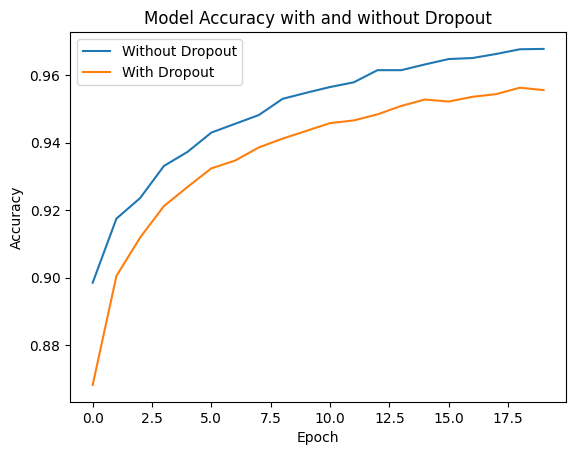

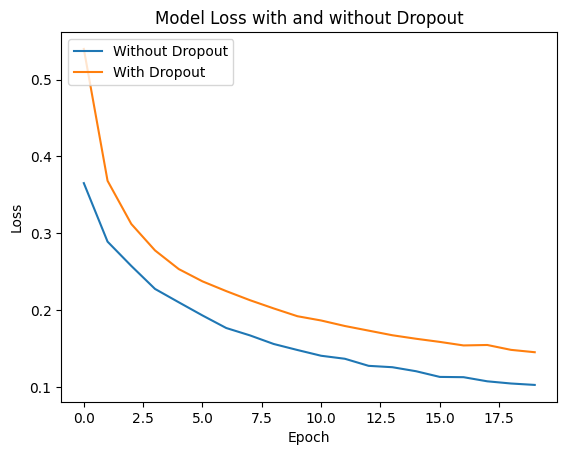

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.title('Model Accuracy with and without Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_without_dropout.history['val_loss'], label='Without Dropout')
plt.plot(history_with_dropout.history['val_loss'], label='With Dropout')
plt.title('Model Loss with and without Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


| Dropout    | Accuracy       |
|------------|----------------|
| Before     |      0.9777          |
| After      |        0.9197          |

dropput is a technique used to prevent overfitiing in neural networks .the basic idea of drop out is drop some percipreons in back neurons this make model shift aliitle bit from the target.
this may cause less accuracy  but it helps to get rid of over fitting  and less training time


# Q6 Regarding Q2, after enhancing the model, please provide proof of the differences in performance for each activation function used. Compare the results for each activation function to demonstrate how they affect the model's performance.

Training with activation: relu
model accuracy with activation: relu is  0.979200005531311
Training with activation: sigmoid
model accuracy with activation: sigmoid is  0.9787999987602234
Training with activation: tanh
model accuracy with activation: tanh is  0.9782000184059143
Training with activation: <LeakyReLU name=leaky_re_lu, built=False>
model accuracy with activation: <LeakyReLU name=leaky_re_lu, built=True> is  0.9761000275611877
Training with activation: elu
model accuracy with activation: elu is  0.9778000116348267


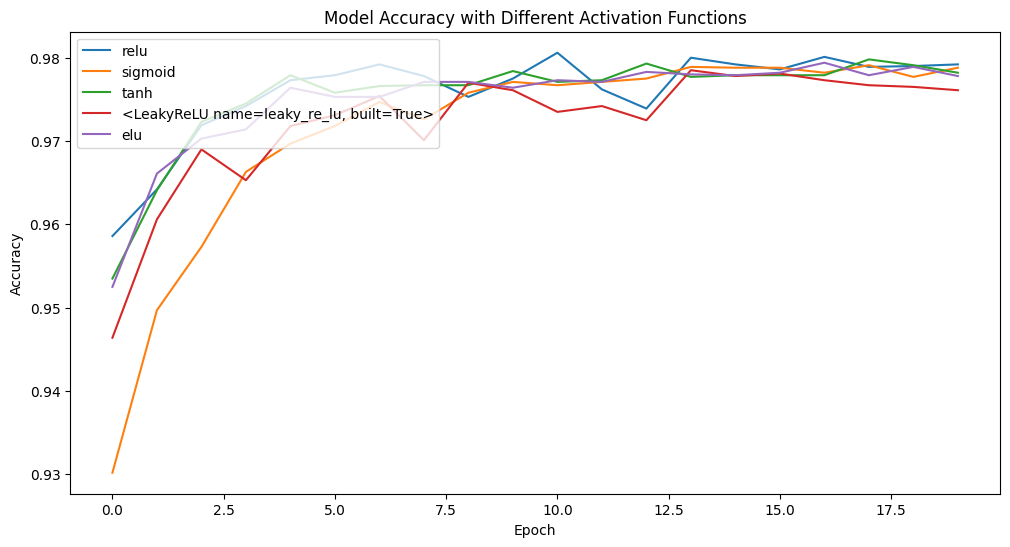

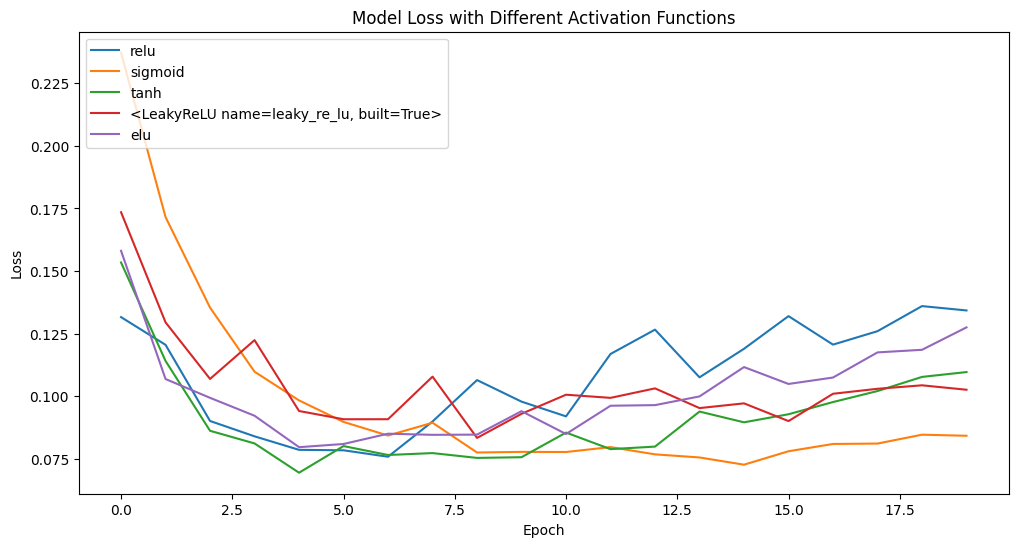

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

def create_model(activation):
    """ Creates a model with the specified activation function """
    model = tf.keras.Sequential([
        Dense(100, input_shape=(784,), activation=activation),
        Dense(100, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models for each activation function
activation_functions = ['relu', 'sigmoid', 'tanh', LeakyReLU(), 'elu']
history_dict = {}

for activation in activation_functions:
    model = create_model(activation)
    print(f"Training with activation: {activation}")
    history = model.fit(X_train, y_train, epochs=20, batch_size=48, validation_data=(X_test, y_test), verbose=0)
    history_dict[activation] = history
    print(f"model accuracy with activation: {activation} is ",history.history['val_accuracy'][-1])
    

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(history_dict[activation].history['val_accuracy'], label=f'{activation}')
plt.title('Model Accuracy with Different Activation Functions')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(history_dict[activation].history['val_loss'], label=f'{activation}')
plt.title('Model Loss with Different Activation Functions')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


| Activation Function | Accuracy |
|---------------------|----------|
| ReLU                |0.9783999919891357          |
| Sigmoid             |0.9768000245094299          |
| Tanh                |0.9765999913215637          |
| Leaky ReLU          |0.978600025177002          |
| ELU (Exponential Linear Unit) |0.9787999987602234  |


# Q7: What is the best approach for improving model performance: adding more hidden layers or increasing the number of nodes per hidden layer? Please provide code examples to support your suggestions.

after trying with code , we found that increasing number of nodes per layer made better result iin accuracy than adding more layers

In [44]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(100, activation='relu')(inputs)
    # Hidden layer2
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=48, validation_split=0.3)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh,batch_size=5)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8344 - loss: 0.5924 - val_accuracy: 0.9397 - val_loss: 0.2066
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9470 - loss: 0.1804 - val_accuracy: 0.9509 - val_loss: 0.1641
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9649 - loss: 0.1215 - val_accuracy: 0.9616 - val_loss: 0.1345
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9728 - loss: 0.0940 - val_accuracy: 0.9644 - val_loss: 0.1206
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9784 - loss: 0.0707 - val_accuracy: 0.9657 - val_loss: 0.1201
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9832 - loss: 0.0574 - val_accuracy: 0.9650 - val_loss: 0.1196
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9862 - loss: 0.0461 - val_accuracy: 0.9657 - val_loss: 0.1160
Epoch 8/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9906 - loss: 0.0353 - val_accuracy: 0.

In [45]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(20, activation='relu')(inputs)
        # Hidden layer
    x1 = tf.keras.layers.Dense(30, activation='relu')(x)
        # Hidden layer
    x2 = tf.keras.layers.Dense(30, activation='relu')(x1)
        # Hidden layer
    x3 = tf.keras.layers.Dense(20, activation='relu')(x2)
    # Hidden layer2
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x3)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=48, validation_split=0.3)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh,batch_size=5)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7080 - loss: 0.9532 - val_accuracy: 0.9149 - val_loss: 0.2912
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9317 - loss: 0.2397 - val_accuracy: 0.9367 - val_loss: 0.2136
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9425 - loss: 0.1895 - val_accuracy: 0.9411 - val_loss: 0.2049
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9478 - loss: 0.1753 - val_accuracy: 0.9437 - val_loss: 0.1981
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9533 - loss: 0.1522 - val_accuracy: 0.9478 - val_loss: 0.1796
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9596 - loss: 0.1378 - val_accuracy: 0.9498 - val_loss: 0.1708
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9616 - loss: 0.1243 - val_accuracy: 0.9420 - val_loss: 0.1986
Epoch 8/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9656 - loss: 0.1169 - val_accuracy: 0.

# Q9 What is batch normalization, and why is it used in neural network training? Describe how batch normalization impacts the learning process and its benefits for training deep networks




Batch normalization is a technique used in training deep neural networks to improve the speed, performance, and stability of the training process. It normalizes the inputs to a layer for each mini-batch during training,
 It helps stabilize and accelerate the training process by ensuring that the inputs to each layer are normalized to have a consistent distribution.
..................................................................

# How does batch normalization assist in training deep neural networks? Share your observations and insights after applying batch normalization to your model architecture. If you did not use batch normalization, explain why and provide evidence to support your decision."

to make sure that all input data are the same range to make sure that there arenot vanishing or exploding values and also that make model faster if all values are less than 1 
.............................................................................................................

In [46]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(20, activation='relu')(inputs)
        # Hidden layer
    x1 = tf.keras.layers.Dense(30, activation='relu')(x)
        # Hidden layer
    x2 = tf.keras.layers.Dense(30, activation='relu')(x1)
        # Hidden layer
    x3 = tf.keras.layers.Dense(20, activation='relu')(x2)
    # Hidden layer2
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x3)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=48, validation_split=0.3)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh,batch_size=5)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6718 - loss: 0.9584 - val_accuracy: 0.9225 - val_loss: 0.2638
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9303 - loss: 0.2376 - val_accuracy: 0.9325 - val_loss: 0.2253
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9457 - loss: 0.1843 - val_accuracy: 0.9390 - val_loss: 0.2041
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9535 - loss: 0.1577 - val_accuracy: 0.9477 - val_loss: 0.1862
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9570 - loss: 0.1467 - val_accuracy: 0.9487 - val_loss: 0.1780
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9622 - loss: 0.1256 - val_accuracy: 0.9466 - val_loss: 0.1854
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9658 - loss: 0.1091 - val_accuracy: 0.9547 - val_loss: 0.1635
Epoch 8/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9672 - loss: 0.1041 - val_accuracy: 0.

In [47]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(20, activation='relu')(inputs)
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

        # Hidden layer
    x1 = tf.keras.layers.Dense(30, activation='relu')(x)
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

        # Hidden layer
    x2 = tf.keras.layers.Dense(30, activation='relu')(x1)
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

        # Hidden layer
    x3 = tf.keras.layers.Dense(20, activation='relu')(x2)
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Hidden layer2
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x3)
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=48, validation_split=0.3)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh,batch_size=5)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6945 - loss: 0.9579 - val_accuracy: 0.9162 - val_loss: 0.2918
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9200 - loss: 0.2715 - val_accuracy: 0.9299 - val_loss: 0.2405
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9417 - loss: 0.1990 - val_accuracy: 0.9381 - val_loss: 0.2092
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9464 - loss: 0.1765 - val_accuracy: 0.9456 - val_loss: 0.1846
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9570 - loss: 0.1456 - val_accuracy: 0.9479 - val_loss: 0.1826
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9617 - loss: 0.1246 - val_accuracy: 0.9509 - val_loss: 0.1712
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9651 - loss: 0.1135 - val_accuracy: 0.9515 - val_loss: 0.1715
Epoch 8/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9664 - loss: 0.1074 - val_accuracy: 0.

| batch normalization | Accuracy |
|---------------------|----------|
| Before              |    0.9514       |
| After               |  0.9592000246047974        |

# Advanced Part (optional)

# Convert your TensorFlow model to PyTorch. Provide the PyTorch code equivalent of your TensorFlow model, ensuring that the architecture, hyperparameters, and any custom layers or functionalities are correctly translated."

In [48]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(100, activation='relu')(inputs)
    # Hidden layer2
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=48, validation_split=0.3)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh,batch_size=5)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8339 - loss: 0.5815 - val_accuracy: 0.9388 - val_loss: 0.2114
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9508 - loss: 0.1779 - val_accuracy: 0.9543 - val_loss: 0.1541
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9666 - loss: 0.1157 - val_accuracy: 0.9612 - val_loss: 0.1306
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9741 - loss: 0.0894 - val_accuracy: 0.9667 - val_loss: 0.1122
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9807 - loss: 0.0691 - val_accuracy: 0.9706 - val_loss: 0.1026
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9857 - loss: 0.0506 - val_accuracy: 0.9685 - val_loss: 0.1034
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9866 - loss: 0.0463 - val_accuracy: 0.9714 - val_loss: 0.0980
Epoch 8/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9897 - loss: 0.0360 - val_accuracy: 0.

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(784, 100)  # Hidden layer
        self.fc2 = nn.Linear(100, 10)   # Output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Hidden layer with ReLU activation
        x = F.softmax(self.fc2(x), dim=1)  # Output layer with softmax
        return x

# Initialize the model
model = SimpleNN()

# Set optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Prepare your dataset (Assuming X_train and y_train are in numpy arrays)
train_data = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.long)  # PyTorch expects labels as longs
train_dataset = TensorDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=48, shuffle=True)

# Train the model
epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# Evaluate the model on the test set
model.eval()
test_data = torch.tensor(X_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.long)
test_outputs = model(test_data)
_, test_predicted = torch.max(test_outputs, 1)
test_acc = (test_predicted == test_labels).sum().item() / len(test_labels)
print(f"Test accuracy: {test_acc:.2f}")


Epoch [1/30], Loss: 1.5969, Accuracy: 89.14%
Epoch [2/30], Loss: 1.5306, Accuracy: 93.72%
Epoch [3/30], Loss: 1.5153, Accuracy: 95.03%
Epoch [4/30], Loss: 1.5056, Accuracy: 95.92%
Epoch [5/30], Loss: 1.4989, Accuracy: 96.57%
Epoch [6/30], Loss: 1.4940, Accuracy: 97.03%
Epoch [7/30], Loss: 1.4897, Accuracy: 97.41%
Epoch [8/30], Loss: 1.4868, Accuracy: 97.69%
Epoch [9/30], Loss: 1.4843, Accuracy: 97.90%
Epoch [10/30], Loss: 1.4823, Accuracy: 98.09%
Epoch [11/30], Loss: 1.4806, Accuracy: 98.27%
Epoch [12/30], Loss: 1.4793, Accuracy: 98.36%
Epoch [13/30], Loss: 1.4781, Accuracy: 98.46%
Epoch [14/30], Loss: 1.4770, Accuracy: 98.56%
Epoch [15/30], Loss: 1.4763, Accuracy: 98.64%
Epoch [16/30], Loss: 1.4751, Accuracy: 98.75%
Epoch [17/30], Loss: 1.4744, Accuracy: 98.79%
Epoch [18/30], Loss: 1.4742, Accuracy: 98.82%
Epoch [19/30], Loss: 1.4734, Accuracy: 98.87%
Epoch [20/30], Loss: 1.4731, Accuracy: 98.92%
Epoch [21/30], Loss: 1.4724, Accuracy: 98.96%
Epoch [22/30], Loss: 1.4720, Accuracy: 99.0

# Finally, print the accuracy for each model architecture. Discuss with your team the differences observed in accuracy across various architectures, and analyze the potential reasons behind these variations."

Test accuracy: 0.9765999913215637 in tensorflow
Test accuracy: 0.98 in pytorch

both results are appromixatly the same 

# Callback

### search for Callback method In TensorFlow and Keras, a callback is a set of functions that can be applied at various stages of the training process, allowing you to customize the behavior of the training loop. Callbacks provide a way to monitor and intervene during training, enabling features 

In [50]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.001):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(100, activation='relu')(inputs)
    
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Set the optimizer with the given learning rate
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    
    # Compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# # # # Learning rate scheduler function
# # # def scheduler(epoch, lr):
# # #     if epoch < 10:
# # #         return lr
# # #     else:
# # #         return lr * 0.1  # Reduce learning rate after 10 epochs

# Initialize the model
model = create_model(optimizer='adam', learning_rate=0.001)

# Define callbacks
# # # early_stopping = tf.keras.callbacks.EarlyStopping(
# # #     monitor='val_accuracy',      # Monitor validation accuracy
# # #     patience=5,              # Stop after 5 epochs of no improvement
# # #     restore_best_weights=True  # Restore the best weights after stopping
# # # )

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_checkpoint.keras',  # Filepath to save the best model
    save_best_only=True,             # Save only the best model
    monitor='val_accuracy'               # Monitor validation loss
)

# # # lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation loss
    factor=0.2,          # Reduce learning rate by 20%
    patience=5,          # Wait for 3 epochs with no improvement
    min_lr=0.001         # Set minimum learning rate
)

# Create a list of callbacks to pass to model.fit
###callbacks = [early_stopping, checkpoint, lr_scheduler, reduce_lr]
###callbacks = [checkpoint, lr_scheduler, reduce_lr]
callbacks = [checkpoint, reduce_lr]

# Train the model
history = model.fit(
    X_train, y_train_oh,
    epochs=30,
    batch_size=48,
    validation_split=0.3,
    callbacks=callbacks  # Pass the callbacks
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh, batch_size=5)
print(f"Test accuracy: {test_acc}")


Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8361 - loss: 0.5828 - val_accuracy: 0.9422 - val_loss: 0.1991 - learning_rate: 0.0010
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9503 - loss: 0.1700 - val_accuracy: 0.9554 - val_loss: 0.1522 - learning_rate: 0.0010
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9649 - loss: 0.1169 - val_accuracy: 0.9626 - val_loss: 0.1259 - learning_rate: 0.0010
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9746 - loss: 0.0849 - val_accuracy: 0.9630 - val_loss: 0.1209 - learning_rate: 0.0010
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9801 - loss: 0.0676 - val_accuracy: 0.9664 - val_loss: 0.1116 - learning_rate: 0.0010
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9855 - loss: 0.0510 - val_accuracy: 0.9692 - val_loss: 0.1037 - learning_rate: 0.0010
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9873 - loss: 0.0444 - 

# Tensorboard!!!!!!

## Review the following code and provide a detailed explanation of how it works. Describe each section and its purpose, and explain how the code achieves its intended functionality.

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Split data into training and validation sets
X_val, X_train = X_train[:10000], X_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

##this function is to create model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model
##this function is to train and evaluate model
def train_and_evaluate(optimizer, X_train, y_train, X_val, y_val):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=10, 
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'AdaDelta': tf.keras.optimizers.Adadelta(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adam': tf.keras.optimizers.Adam()
}

# Train and evaluate models with different optimizers
results = {}
## for loop to train model with diffrent optimisers
for name, optimizer in optimizers.items():
    accuracy = train_and_evaluate(optimizer, X_train, y_train, X_val, y_val)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"Optimizer: {name}, Validation Accuracy: {accuracy:.4f}")


c:\Users\workstation\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Optimizer: SGD, Validation Accuracy: 0.9485
Optimizer: Momentum, Validation Accuracy: 0.9771
Optimizer: RMSprop, Validation Accuracy: 0.9752
Optimizer: AdaDelta, Validation Accuracy: 0.7681
Optimizer: Adagrad, Validation Accuracy: 0.9091
Optimizer: Adam, Validation Accuracy: 0.9775


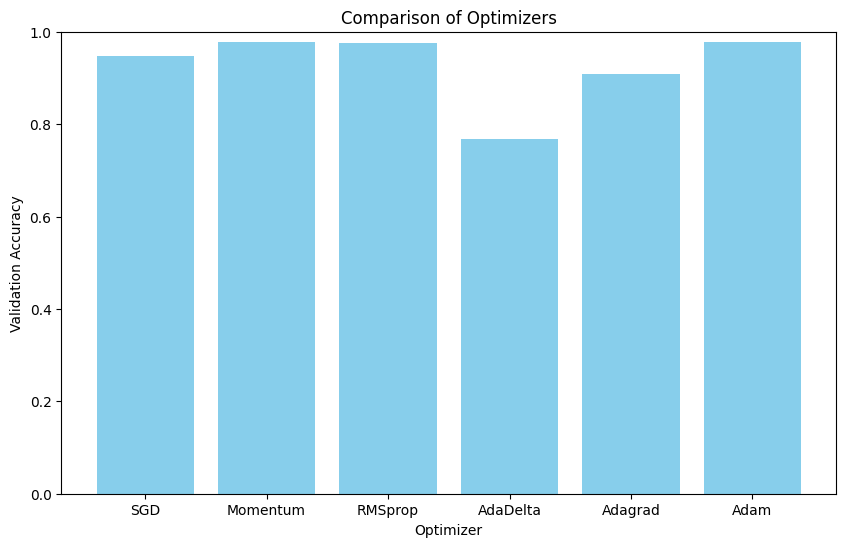

In [52]:
# Plotting the results
names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Optimizers')
plt.ylim([0, 1])
plt.show()

# Anothe challenge

# In this dataset, all deep learning architectures attempted so far have resulted in overfitting. Explore and apply various techniques to mitigate overfitting, such as regularization, dropout, data augmentation, and early stopping. Please provide feedback on the effectiveness of each method and summarize your results.

# Dataset Description

This dataset contains information related to students in an educational context. It includes various demographic, behavioral, and academic features, which can be used to analyze student performance and engagement. The dataset consists of the following attributes:

- **gender:** The gender of the student (e.g., male, female).
- **NationalITy:** The nationality of the student, which may influence educational outcomes.
- **PlaceofBirth:** The geographic location where the student was born, providing insights into potential cultural and socio-economic factors.
- **StageID:** The educational stage or level the student is currently in (e.g., primary, secondary).
- **GradeID:** The grade or year the student is enrolled in, indicating their progress in the education system.
- **SectionID:** The specific section or class within a grade that the student belongs to.
- **Topic:** The subject or topic of study, relevant for performance analysis in specific areas.
- **Semester:** The semester in which the data was collected, which may affect academic performance and engagement.
- **Relation:** The relationship of the student with their parents (e.g., mother, father), potentially influencing support and academic outcomes.
- **raisedhands:** The number of times the student raised their hands in class, indicating participation and engagement.
- **VisITedResources:** The number of educational resources the student has accessed, which reflects their engagement with the material.
- **AnnouncementsView:** The number of times the student viewed announcements from the school, suggesting their awareness of important updates.
- **Discussion:** The level of participation in discussions, indicating engagement in collaborative learning.
- **ParentAnsweringSurvey:** Responses from parents in a survey, which may provide insights into parental involvement.
- **ParentschoolSatisfaction:** The satisfaction level of parents with the school, which could correlate with student performance.
- **StudentAbsenceDays:** The number of days the student was absent, which can impact learning outcomes.
- **Class:** The target variable indicating the student's performance category or final grade, often used for classification tasks.

**Challenges:** The dataset may exhibit challenges such as class imbalance, varying levels of engagement among students, and the influence of external factors on academic performance.

This dataset is suitable for analysis aimed at understanding student behavior, predicting academic outcomes, and identifying factors contributing to student success or challenges.


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2672 - loss: 8.9061 - val_accuracy: 0.2644 - val_loss: 3.3252
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3620 - loss: 2.9080 - val_accuracy: 0.3908 - val_loss: 1.6366
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5364 - loss: 1.1344 - val_accuracy: 0.4483 - val_loss: 1.3073
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5170 - loss: 0.7372 - val_accuracy: 0.4828 - val_loss: 1.1348
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5176 - loss: 0.4053 - val_accuracy: 0.5287 - val_loss: 1.0186
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5324 - loss: 0.3080 - val_accuracy: 0.5747 - val_loss: 0.8064
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5683 - loss: 0.0401 - val_accuracy: 0.5747 - val_loss: 0.5700
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5651 - loss: -0.0017 - val_accuracy: 0.5517 - val_loss: 0.336

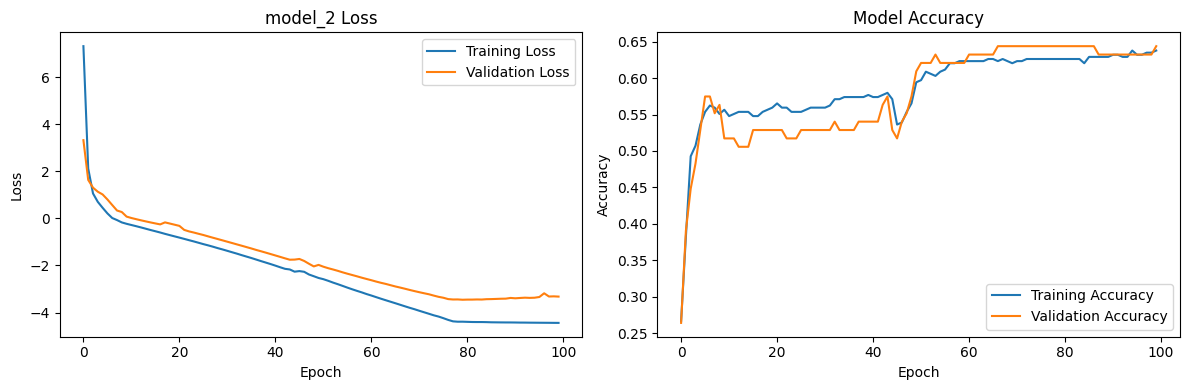

In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('Dataset.csv')
#data.drop(columns=['PlaceofBirth','SectionID','GradeID','StageID'],axis=1,inplace=True)
data.drop(columns=['PlaceofBirth','SectionID','GradeID','StageID','gender', 'NationalITy'],axis=1,inplace=True)

data.loc[data["Class"] == "L", "Class"] = 0
data.loc[data["Class"] == "M", "Class"] = 1
data.loc[data["Class"] == "H", "Class"] = 2
##display(data)
##print(data.columns)

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply OneHotEncoder to categorical features
categorical_columns = [  'Topic', 'Semester', 
                       'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']
numerical_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']


encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_columns])


# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])


# Combine scaled numerical and encoded categorical features
X_preprocessed = np.hstack((X_scaled, X_encoded))




# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, random_state=43)
#X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1)


# Convert the labels into float32 (binary classification scenario)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

def create_model(optimizer='adam', learning_rate=0.001):
    # Input layer
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    #tf.keras.layers.BatchNormalization(),  # Batch Normalization
    
    # Hidden layer
    x = tf.keras.layers.Dense(20, activation='tanh')(inputs)
    #tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% rate
    #tf.keras.layers.BatchNormalization(),  # Batch Normalization

    
    # Hidden layer
    x1 = tf.keras.layers.Dense(20, activation='tanh')(x)
    #tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% rate
    #tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Hidden layer
    x2 = tf.keras.layers.Dense(20, activation='tanh')(x1)
    #tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% rate
    #tf.keras.layers.BatchNormalization(),  # Batch Normalization


    x3 = tf.keras.layers.Dense(20, activation='tanh')(x2)

    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='tanh')(x3)
    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Set the optimizer with the given learning rate
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    
    # Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Define the model
model =create_model() 

# # early_stopping = tf.keras.callbacks.EarlyStopping(
# #     monitor='val_accuracy', patience=10, restore_best_weights=True
# # )
#model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
# # history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=5, callbacks=[early_stopping])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=50)


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test ,batch_size=1)
print(f"Test Accuracy: {test_acc:.4f}")


# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

